# Corner Detection

In [253]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import signal
from skimage import color
import math

In [254]:
# function of img show
def imshow(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
        
    plt.imshow(image)
    plt.axis('off')
    plt.show()

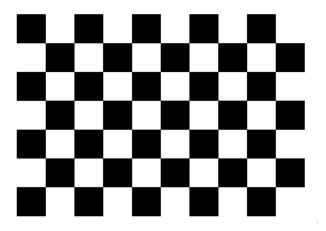

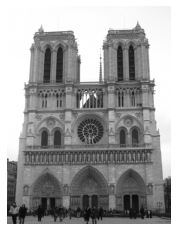

In [255]:
# read original images with grayscale
img1 = cv2.imread('chessboard-hw1.jpg',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('1a_notredame.jpg',cv2.IMREAD_GRAYSCALE)
imshow(img1)
imshow(img2)

a. Gaussian Smooth

In [256]:
# make gaussian kernel
def gaussian_kernels(size,sigma):
    kernel = np.zeros((size,size),dtype = np.float64)
    bound = size//2
    
    for x in range(-bound,size - bound):
        for y in range(-bound,size - bound):
            kernel[y+bound,x+bound] = np.exp( -(x**2 + y**2) / (2 * sigma**2) )
    
    kernel /= (2 * np.pi * sigma**2 )
    kernel /= kernel.sum()
    return kernel

In [257]:
print(gaussian_kernels(5,5))

[[0.03688345 0.03916419 0.03995536 0.03916419 0.03688345]
 [0.03916419 0.04158597 0.04242606 0.04158597 0.03916419]
 [0.03995536 0.04242606 0.04328312 0.04242606 0.03995536]
 [0.03916419 0.04158597 0.04242606 0.04158597 0.03916419]
 [0.03688345 0.03916419 0.03995536 0.03916419 0.03688345]]


In [258]:
# conv gaussian kernel with input image
# 𝜎 = 5 , size = 5
# image 1
smooth_img1_size5 = signal.convolve2d(
    img1, 
    gaussian_kernels(5,5), 
    mode='same', boundary='fill', fillvalue=0
)

plt.imsave('./output/normal/smooth_img1_size5.jpg',smooth_img1_size5,cmap="gray")

# image 2
smooth_img2_size5 = signal.convolve2d(
    img2, 
    gaussian_kernels(5,5), 
    mode='same', boundary='fill', fillvalue=0
)

plt.imsave('./output/normal/smooth_img2_size5.jpg',smooth_img2_size5,cmap="gray")

In [259]:
# conv gaussian kernel with input image
# 𝜎 = 5 , size = 10
# image 1
smooth_img1_size10 = signal.convolve2d(
    img1, 
    gaussian_kernels(10,5), 
    mode='same', boundary='fill', fillvalue=0
)

plt.imsave('./output/normal/smooth_img1_size10.jpg',smooth_img1_size10,cmap="gray")

# image 2
smooth_img2_size10 = signal.convolve2d(
    img2, 
    gaussian_kernels(10,5), 
    mode='same', boundary='fill', fillvalue=0
)

plt.imsave('./output/normal/smooth_img2_size10.jpg',smooth_img2_size10,cmap="gray")

b. Intensity Gradient

In [260]:
# sobel edge detection
def sobel_edge_detection(image):
    filter_gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    filter_gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    filter_gx = filter_gx[::-1,::-1]
    filter_gy = filter_gy[::-1,::-1]
    
    # cal gradient x
    gx = signal.convolve2d(
    image, 
    filter_gx, 
    mode='same', boundary='fill', fillvalue=0)
    
    # cal gradient y
    gy = signal.convolve2d(
    image, 
    filter_gy, 
    mode='same', boundary='fill', fillvalue=0)
    
    # gradient magnitude image
    gradient_magnitude = np.sqrt(np.square(gx) + np.square(gy))
    # visualize the gradient magnitude image
    gradient_magnitude = 255.0 * (gradient_magnitude-gradient_magnitude.min())/(gradient_magnitude.max()-gradient_magnitude.min())
    gradient_magnitude = np.round(gradient_magnitude)
    gradient_magnitude = gradient_magnitude.astype(np.uint8)
    
    # eliminate weak gradients by proper threshold
    gradient_magnitude[gradient_magnitude < 10]= 0
    
    # gradient direction image
    gradient_direction = np.arctan2(gy,gx)
    h,w = image.shape
    hsv = np.zeros((h, w, 3))
    hsv[..., 0] = (gradient_direction + np.pi) / (2 * np.pi)
    hsv[..., 1] = np.ones((h, w))
    hsv[..., 2] = gradient_magnitude
    gradient_direction_rgb = color.hsv2rgb(hsv)
    gradient_direction_rgb = np.round(gradient_direction_rgb)
    gradient_direction_rgb = gradient_direction_rgb.astype(np.uint8)
    
    
    return gradient_magnitude,gradient_direction_rgb,gx,gy

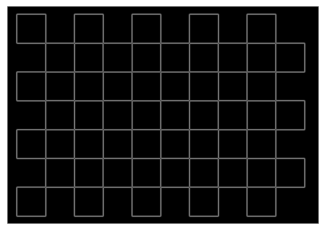

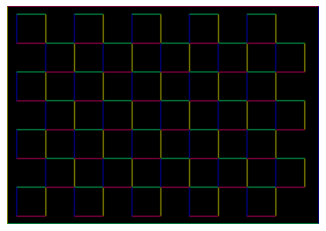

True

In [261]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_img1_size5)
imshow(gradient_magnitude)
imshow(gradient_direction)
cv2.imwrite('./output/normal/smooth_img1_size5_gradient_magnitude.jpg',gradient_magnitude)
cv2.imwrite('./output/normal/smooth_img1_size5_gradient_direction.jpg',gradient_direction)

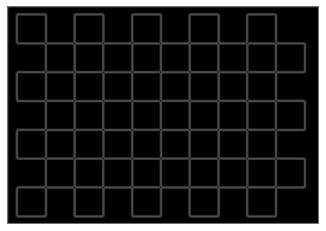

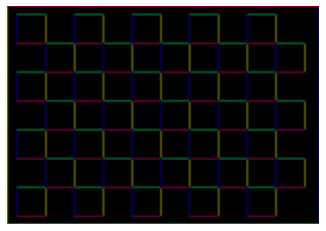

True

In [262]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_img1_size10)
imshow(gradient_magnitude)
imshow(gradient_direction)
cv2.imwrite('./output/normal/smooth_img1_size10_gradient_magnitude.jpg',gradient_magnitude)
cv2.imwrite('./output/normal/smooth_img1_size10_gradient_direction.jpg',gradient_direction)

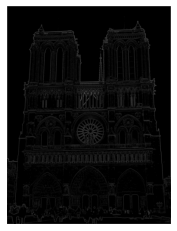

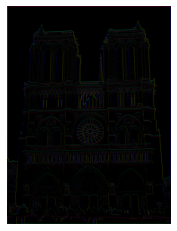

True

In [263]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_img2_size5)
imshow(gradient_magnitude)
imshow(gradient_direction)
cv2.imwrite('./output/normal/smooth_img2_size5_gradient_magnitude.jpg',gradient_magnitude)
cv2.imwrite('./output/normal/smooth_img2_size5_gradient_direction.jpg',gradient_direction)

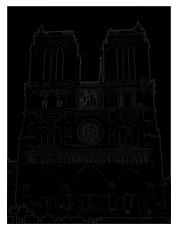

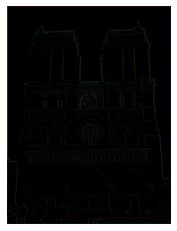

True

In [264]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_img2_size10)
imshow(gradient_magnitude)
imshow(gradient_direction)
cv2.imwrite('./output/normal/smooth_img2_size10_gradient_magnitude.jpg',gradient_magnitude)
cv2.imwrite('./output/normal/smooth_img2_size10_gradient_direction.jpg',gradient_direction)

c. Structure Tensor

In [265]:
def structure_tensor(image,gx,gy,window_size,threshold):
   
    xx_grad = gx * gx
    yy_grad = gy * gy
    xy_grad = gx * gy
    
    pad = window_size//2
    
    h,w = image.shape
    smaller_eigenvalue_image = np.zeros((h,w))
    R_image = np.zeros((h,w))
    
    max_R = 0
    
    for i in range(pad,int(image.shape[0] - pad)):
        for j in range(pad, int(image.shape[1] - pad)) :
            window_x = xx_grad[i-pad : i+pad+1 , j-pad : j+pad+1]
            window_y = yy_grad[i-pad : i+pad+1 , j-pad : j+pad+1]
            window_xy = xy_grad[i-pad : i+pad+1 , j-pad : j+pad+1]
            sum_xx = np.sum(window_x,dtype = np.int64)
            sum_yy = np.sum(window_y,dtype = np.int64)
            sum_xy = np.sum(window_xy,dtype = np.int64)
            determinant = (sum_xx * sum_yy) - (sum_xy * sum_xy)
            trace = sum_xx + sum_yy
            smaller_eigenvalue = determinant / trace
            R = determinant - (0.04 * trace * trace)
            
            #if R > max_R:
            #    max_R = R
                
            if np.isnan(smaller_eigenvalue):
                smaller_eigenvalue = 0
                
            smaller_eigenvalue_image[i][j] = smaller_eigenvalue
            R_image[i][j] = R
            
    #threshold = max_R * threshold_ratio
    
    for i in range(R_image.shape[0]):
        for j in range(R_image.shape[1]):
            if R_image[i][j] < threshold:
                smaller_eigenvalue_image[i][j] = 0
    
    
    #smaller_eigenvalue_image = np.round(smaller_eigenvalue_image)
    smaller_eigenvalue_image = smaller_eigenvalue_image.astype(np.uint8)
    
    return smaller_eigenvalue_image

In [266]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_img1_size10)
img1_smaller_eigenvalue_window_3 = structure_tensor(smooth_img1_size10,gx,gy,3,10000)
plt.imsave('./output/normal/img1_smaller_eigenvalue_window_3.jpg',img1_smaller_eigenvalue_window_3,cmap="gray")

C:\Users\USER\AppData\Local\Temp/ipykernel_9316/3490902079.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  smaller_eigenvalue = determinant / trace


In [267]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_img1_size10)
img1_smaller_eigenvalue_window_5 = structure_tensor(smooth_img1_size10,gx,gy,5,10000)
plt.imsave('./output/normal/img1_smaller_eigenvalue_window_5.jpg',img1_smaller_eigenvalue_window_5,cmap="gray")

C:\Users\USER\AppData\Local\Temp/ipykernel_9316/3490902079.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  smaller_eigenvalue = determinant / trace


In [268]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_img2_size10)
img2_smaller_eigenvalue_window_3 = structure_tensor(smooth_img2_size10,gx,gy,3,50000000)
plt.imsave('./output/normal/img2_smaller_eigenvalue_window_3.jpg',img2_smaller_eigenvalue_window_3,cmap="gray")

C:\Users\USER\AppData\Local\Temp/ipykernel_9316/3490902079.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  smaller_eigenvalue = determinant / trace


In [269]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_img2_size10)
img2_smaller_eigenvalue_window_5 = structure_tensor(smooth_img2_size10,gx,gy,5,50000000)
plt.imsave('./output/normal/img2_smaller_eigenvalue_window_5.jpg',img2_smaller_eigenvalue_window_5,cmap="gray")

C:\Users\USER\AppData\Local\Temp/ipykernel_9316/3490902079.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  smaller_eigenvalue = determinant / trace


d. Non-maximal Suppression

In [270]:
def Non_Maximal_Suppression(img_path,eigenvalue,dis):
    img = cv2.imread(img_path)
    L = []
    for i in range(int(eigenvalue.shape[0])):
        for j in range(int(eigenvalue.shape[1])):
            if eigenvalue[i][j] > 0:
                L.append([i,j,eigenvalue[i][j]])
            
    sorted_L = sorted(L, key = lambda x: x[2], reverse = True)
    final_L = []
    x = []
    y = []
    
    for i in sorted_L :
        too_close = False
        for j in final_L :
            if math.sqrt((j[0] - i[0])**2 + (j[1] - i[1])**2) <= dis :
                too_close = True
                break
        if not too_close:
            final_L.append(i[:-1])
            x.append(i[1])
            y.append(i[0])
    
    for point in range(len(x)):
        cv2.circle(img,(x[point], y[point]), 7, (0, 0, 255), -1)
        
    imshow(img)
    return img

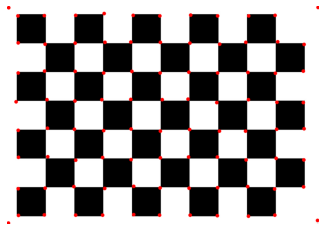

True

In [271]:
img_corner_detection = Non_Maximal_Suppression('chessboard-hw1.jpg',img1_smaller_eigenvalue_window_3,30)
cv2.imwrite('./output/normal/img1_nms_window_3.jpg',img_corner_detection)

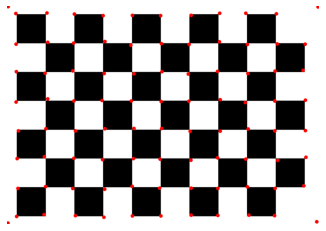

True

In [272]:
img_corner_detection = Non_Maximal_Suppression('chessboard-hw1.jpg',img1_smaller_eigenvalue_window_5,30)
cv2.imwrite('./output/normal/img1_nms_window_5.jpg',img_corner_detection)

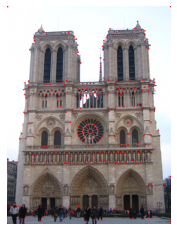

True

In [273]:
img_corner_detection = Non_Maximal_Suppression('1a_notredame.jpg',img2_smaller_eigenvalue_window_3,30)
cv2.imwrite('./output/normal/img2_nms_window_3.jpg',img_corner_detection)

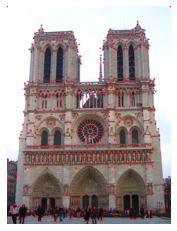

True

In [274]:
img_corner_detection = Non_Maximal_Suppression('1a_notredame.jpg',img2_smaller_eigenvalue_window_5,30)
cv2.imwrite('./output/normal/img2_nms_window_5.jpg',img_corner_detection)

# Experiment

rotated image

In [275]:
def rotate(img):
    (h,w,c) = img.shape
    center = (w / 2, h / 2)
    M = cv2.getRotationMatrix2D(center, 30, 1.0)
    rotate_img = cv2.warpAffine(img, M, (w, h)) 
    return rotate_img

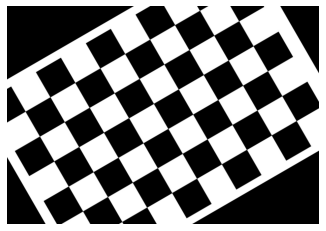

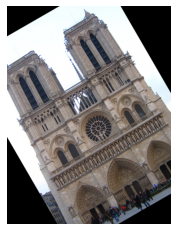

True

In [276]:
img1 = cv2.imread('chessboard-hw1.jpg')
img2 = cv2.imread('1a_notredame.jpg')
rotate_img1 = rotate(img1)
rotate_img2 = rotate(img2)
imshow(rotate_img1)
imshow(rotate_img2)
cv2.imwrite('./output/transformed/rotate_img1.jpg',rotate_img1)
cv2.imwrite('./output/transformed/rotate_img2.jpg',rotate_img2)

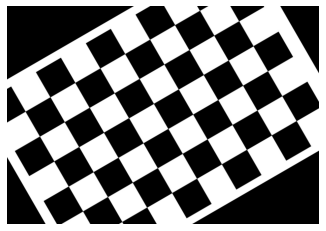

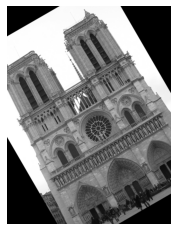

In [277]:
rotate_img1 = cv2.cvtColor(rotate_img1, cv2.COLOR_BGR2GRAY)
rotate_img2 = cv2.cvtColor(rotate_img2, cv2.COLOR_BGR2GRAY)
imshow(rotate_img1)
imshow(rotate_img2)

a. Gaussian Smooth

In [278]:
# conv gaussian kernel with input image
# 𝜎 = 5 , size = 5
# image 1
smooth_rotate_img1_size5 = signal.convolve2d(
    rotate_img1, 
    gaussian_kernels(5,5), 
    mode='same', boundary='fill', fillvalue=0
)

plt.imsave('./output/transformed/smooth_rotate_img1_size5.jpg',smooth_rotate_img1_size5,cmap="gray")

# image 2
smooth_rotate_img2_size5 = signal.convolve2d(
    rotate_img2, 
    gaussian_kernels(5,5), 
    mode='same', boundary='fill', fillvalue=0
)

plt.imsave('./output/transformed/smooth_rotate_img2_size5.jpg',smooth_rotate_img2_size5,cmap="gray")

In [279]:
# conv gaussian kernel with input image
# 𝜎 = 5 , size = 10
# image 1
smooth_rotate_img1_size10 = signal.convolve2d(
    rotate_img1, 
    gaussian_kernels(10,5), 
    mode='same', boundary='fill', fillvalue=0
)

plt.imsave('./output/transformed/smooth_rotate_img1_size10.jpg',smooth_rotate_img1_size10,cmap="gray")

# image 2
smooth_rotate_img2_size10 = signal.convolve2d(
    rotate_img2, 
    gaussian_kernels(10,5), 
    mode='same', boundary='fill', fillvalue=0
)

plt.imsave('./output/transformed/smooth_rotate_img2_size10.jpg',smooth_rotate_img2_size10,cmap="gray")

b. Intensity Gradient

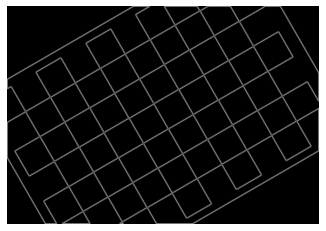

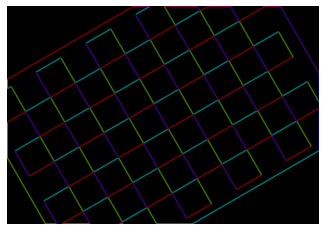

True

In [280]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_rotate_img1_size5)
imshow(gradient_magnitude)
imshow(gradient_direction)
cv2.imwrite('./output/transformed/smooth_rotate_img1_size5_gradient_magnitude.jpg',gradient_magnitude)
cv2.imwrite('./output/transformed/smooth_rotate_img1_size5_gradient_direction.jpg',gradient_direction)

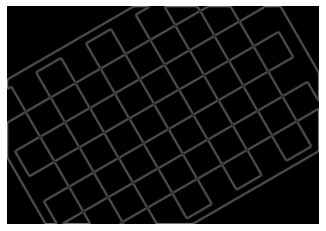

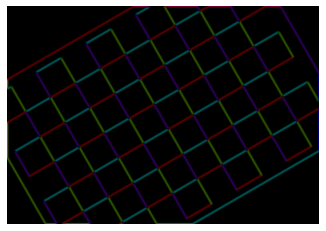

True

In [281]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_rotate_img1_size10)
imshow(gradient_magnitude)
imshow(gradient_direction)
cv2.imwrite('./output/transformed/smooth_rotate_img1_size10_gradient_magnitude.jpg',gradient_magnitude)
cv2.imwrite('./output/transformed/smooth_rotate_img1_size10_gradient_direction.jpg',gradient_direction)

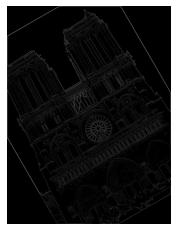

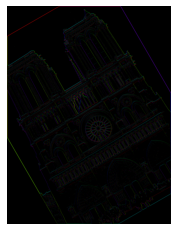

True

In [282]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_rotate_img2_size5)
imshow(gradient_magnitude)
imshow(gradient_direction)
cv2.imwrite('./output/transformed/smooth_rotate_img2_size5_gradient_magnitude.jpg',gradient_magnitude)
cv2.imwrite('./output/transformed/smooth_rotate_img2_size5_gradient_direction.jpg',gradient_direction)

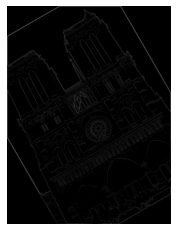

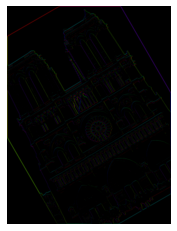

True

In [283]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_rotate_img2_size10)
imshow(gradient_magnitude)
imshow(gradient_direction)
cv2.imwrite('./output/transformed/smooth_rotate_img2_size10_gradient_magnitude.jpg',gradient_magnitude)
cv2.imwrite('./output/transformed/smooth_rotate_img2_size10_gradient_direction.jpg',gradient_direction)

c. Structure Tensor

In [284]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_rotate_img1_size10)
rotate_img1_smaller_eigenvalue_window_3 = structure_tensor(smooth_rotate_img1_size10,gx,gy,3,10000)
plt.imsave('./output/transformed/rotate_img1_smaller_eigenvalue_window_3.jpg',rotate_img1_smaller_eigenvalue_window_3,cmap="gray")

C:\Users\USER\AppData\Local\Temp/ipykernel_9316/3490902079.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  smaller_eigenvalue = determinant / trace


In [285]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_rotate_img1_size10)
rotate_img1_smaller_eigenvalue_window_5 = structure_tensor(smooth_rotate_img1_size10,gx,gy,5,10000)
plt.imsave('./output/transformed/rotate_img1_smaller_eigenvalue_window_5.jpg',rotate_img1_smaller_eigenvalue_window_5,cmap="gray")

C:\Users\USER\AppData\Local\Temp/ipykernel_9316/3490902079.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  smaller_eigenvalue = determinant / trace


In [286]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_rotate_img2_size10)
rotate_img2_smaller_eigenvalue_window_3 = structure_tensor(smooth_rotate_img2_size10,gx,gy,3,50000000)
plt.imsave('./output/transformed/rotate_img2_smaller_eigenvalue_window_3.jpg',rotate_img2_smaller_eigenvalue_window_3,cmap="gray")

C:\Users\USER\AppData\Local\Temp/ipykernel_9316/3490902079.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  smaller_eigenvalue = determinant / trace


In [287]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_rotate_img2_size10)
rotate_img2_smaller_eigenvalue_window_5 = structure_tensor(smooth_rotate_img2_size10,gx,gy,5,50000000)
plt.imsave('./output/transformed/rotate_img2_smaller_eigenvalue_window_5.jpg',rotate_img2_smaller_eigenvalue_window_5,cmap="gray")

C:\Users\USER\AppData\Local\Temp/ipykernel_9316/3490902079.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  smaller_eigenvalue = determinant / trace


d. Non-maximal Suppression

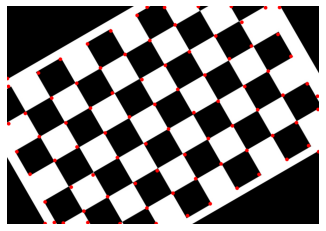

True

In [288]:
img_corner_detection = Non_Maximal_Suppression('./output/transformed/rotate_img1.jpg',rotate_img1_smaller_eigenvalue_window_3,30)
cv2.imwrite('./output/transformed/rotate_img1_nms_window_3.jpg',img_corner_detection)

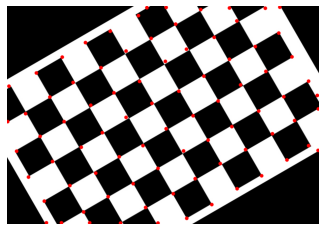

True

In [289]:
img_corner_detection = Non_Maximal_Suppression('./output/transformed/rotate_img1.jpg',rotate_img1_smaller_eigenvalue_window_5,30)
cv2.imwrite('./output/transformed/rotate_img1_nms_window_5.jpg',img_corner_detection)

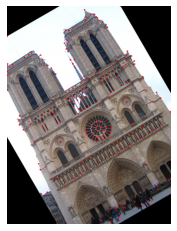

True

In [290]:
img_corner_detection = Non_Maximal_Suppression('./output/transformed/rotate_img2.jpg',rotate_img2_smaller_eigenvalue_window_3,30)
cv2.imwrite('./output/transformed/rotate_img2_nms_window_3.jpg',img_corner_detection)

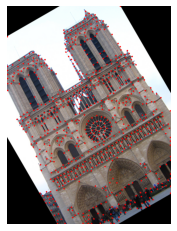

True

In [291]:
img_corner_detection = Non_Maximal_Suppression('./output/transformed/rotate_img2.jpg',rotate_img2_smaller_eigenvalue_window_5,30)
cv2.imwrite('./output/transformed/rotate_img2_nms_window_5.jpg',img_corner_detection)

scaled image

In [292]:
def scale(img):
    (h,w,c) = img.shape
    center = (w // 2, h // 2)
    scale_img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
    return scale_img

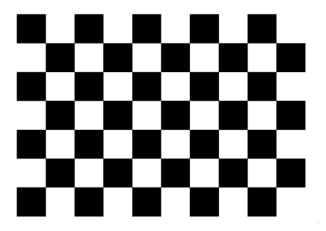

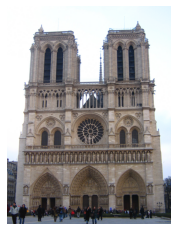

True

In [293]:
img1 = cv2.imread('chessboard-hw1.jpg')
img2 = cv2.imread('1a_notredame.jpg')
scale_img1 = scale(img1)
scale_img2 = scale(img2)
imshow(scale_img1)
imshow(scale_img2)
cv2.imwrite('./output/transformed/scale_img1.jpg',scale_img1)
cv2.imwrite('./output/transformed/scale_img2.jpg',scale_img2)

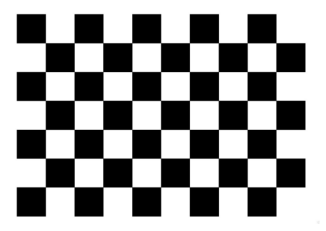

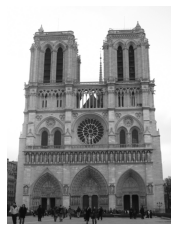

In [294]:
scale_img1 = cv2.cvtColor(scale_img1, cv2.COLOR_BGR2GRAY)
scale_img2 = cv2.cvtColor(scale_img2, cv2.COLOR_BGR2GRAY)
imshow(scale_img1)
imshow(scale_img2)

a. Gaussian Smooth

In [295]:
# conv gaussian kernel with input image
# 𝜎 = 5 , size = 5
# image 1
smooth_scale_img1_size5 = signal.convolve2d(
    scale_img1, 
    gaussian_kernels(5,5), 
    mode='same', boundary='fill', fillvalue=0
)

plt.imsave('./output/transformed/smooth_scale_img1_size5.jpg',smooth_scale_img1_size5,cmap="gray")

# image 2
smooth_scale_img2_size5 = signal.convolve2d(
    scale_img2, 
    gaussian_kernels(5,5), 
    mode='same', boundary='fill', fillvalue=0
)

plt.imsave('./output/transformed/smooth_scale_img2_size5.jpg',smooth_scale_img2_size5,cmap="gray")

In [296]:
# conv gaussian kernel with input image
# 𝜎 = 5 , size = 10
# image 1
smooth_scale_img1_size10 = signal.convolve2d(
    scale_img1,
    gaussian_kernels(10,5), 
    mode='same', boundary='fill', fillvalue=0
)

plt.imsave('./output/transformed/smooth_scale_img1_size10.jpg',smooth_scale_img1_size10,cmap="gray")

# image 2
smooth_scale_img2_size10 = signal.convolve2d(
    scale_img2,
    gaussian_kernels(10,5), 
    mode='same', boundary='fill', fillvalue=0
)

plt.imsave('./output/transformed/smooth_scale_img2_size10.jpg',smooth_scale_img2_size10,cmap="gray")

b. Intensity Gradient

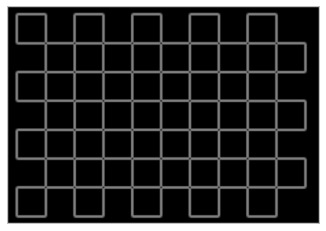

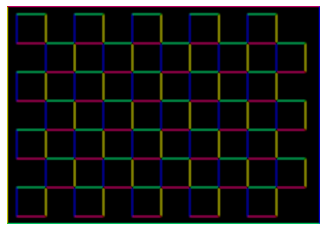

True

In [297]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_scale_img1_size5)
imshow(gradient_magnitude)
imshow(gradient_direction)
cv2.imwrite('./output/transformed/smooth_scale_img1_size5_gradient_magnitude.jpg',gradient_magnitude)
cv2.imwrite('./output/transformed/smooth_scale_img1_size5_gradient_direction.jpg',gradient_direction)

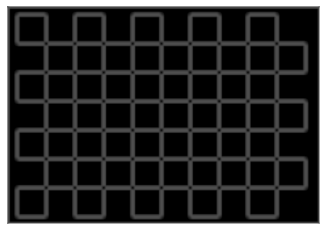

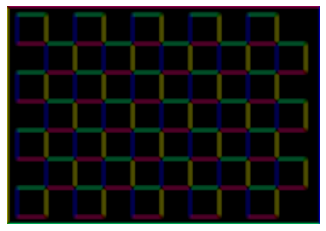

True

In [298]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_scale_img1_size10)
imshow(gradient_magnitude)
imshow(gradient_direction)
cv2.imwrite('./output/transformed/smooth_scale_img1_size10_gradient_magnitude.jpg',gradient_magnitude)
cv2.imwrite('./output/transformed/smooth_scale_img1_size10_gradient_direction.jpg',gradient_direction)

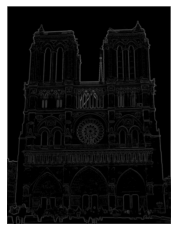

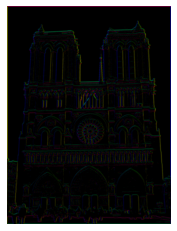

True

In [299]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_scale_img2_size5)
imshow(gradient_magnitude)
imshow(gradient_direction)
cv2.imwrite('./output/transformed/smooth_scale_img2_size5_gradient_magnitude.jpg',gradient_magnitude)
cv2.imwrite('./output/transformed/smooth_scale_img2_size5_gradient_direction.jpg',gradient_direction)

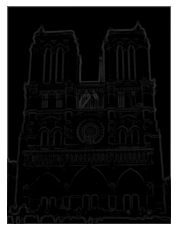

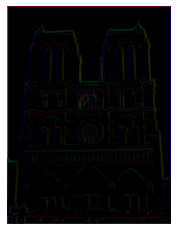

True

In [300]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_scale_img2_size10)
imshow(gradient_magnitude)
imshow(gradient_direction)
cv2.imwrite('./output/transformed/smooth_scale_img2_size10_gradient_magnitude.jpg',gradient_magnitude)
cv2.imwrite('./output/transformed/smooth_scale_img2_size10_gradient_direction.jpg',gradient_direction)

c. Structure Tensor

In [301]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_scale_img1_size10)
scale_img1_smaller_eigenvalue_window_3 = structure_tensor(smooth_scale_img1_size10,gx,gy,3,10000)
plt.imsave('./output/transformed/scale_img1_smaller_eigenvalue_window_3.jpg',scale_img1_smaller_eigenvalue_window_3,cmap="gray")

C:\Users\USER\AppData\Local\Temp/ipykernel_9316/3490902079.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  smaller_eigenvalue = determinant / trace


In [302]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_scale_img1_size10)
scale_img1_smaller_eigenvalue_window_5 = structure_tensor(smooth_scale_img1_size10,gx,gy,5,10000)
plt.imsave('./output/transformed/scale_img1_smaller_eigenvalue_window_5.jpg',scale_img1_smaller_eigenvalue_window_5,cmap="gray")

C:\Users\USER\AppData\Local\Temp/ipykernel_9316/3490902079.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  smaller_eigenvalue = determinant / trace


In [303]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_scale_img2_size10)
scale_img2_smaller_eigenvalue_window_3 = structure_tensor(smooth_scale_img2_size10,gx,gy,3,50000000)
plt.imsave('./output/transformed/scale_img2_smaller_eigenvalue_window_3.jpg',scale_img2_smaller_eigenvalue_window_3,cmap="gray")

C:\Users\USER\AppData\Local\Temp/ipykernel_9316/3490902079.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  smaller_eigenvalue = determinant / trace


In [304]:
gradient_magnitude,gradient_direction,gx,gy = sobel_edge_detection(smooth_scale_img2_size10)
scale_img2_smaller_eigenvalue_window_5 = structure_tensor(smooth_scale_img2_size10,gx,gy,5,50000000)
plt.imsave('./output/transformed/scale_img2_smaller_eigenvalue_window_5.jpg',scale_img2_smaller_eigenvalue_window_5,cmap="gray")

C:\Users\USER\AppData\Local\Temp/ipykernel_9316/3490902079.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  smaller_eigenvalue = determinant / trace


d. Non-maximal Suppression

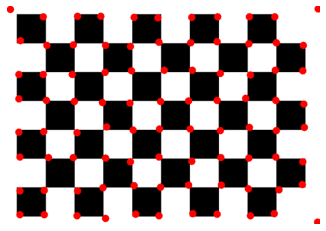

True

In [305]:
img_corner_detection = Non_Maximal_Suppression('./output/transformed/scale_img1.jpg',scale_img1_smaller_eigenvalue_window_3,30)
cv2.imwrite('./output/transformed/scale_img1_nms_window_3.jpg',img_corner_detection)

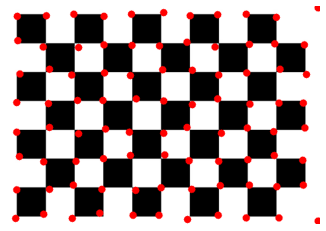

True

In [306]:
img_corner_detection = Non_Maximal_Suppression('./output/transformed/scale_img1.jpg',scale_img1_smaller_eigenvalue_window_5,30)
cv2.imwrite('./output/transformed/scale_img1_nms_window_5.jpg',img_corner_detection)

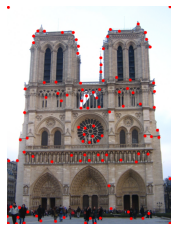

True

In [307]:
img_corner_detection = Non_Maximal_Suppression('./output/transformed/scale_img2.jpg',scale_img2_smaller_eigenvalue_window_3,30)
cv2.imwrite('./output/transformed/scale_img2_nms_window_3.jpg',img_corner_detection)

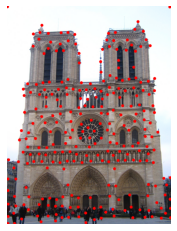

True

In [308]:
img_corner_detection = Non_Maximal_Suppression('./output/transformed/scale_img2.jpg',scale_img2_smaller_eigenvalue_window_5,30)
cv2.imwrite('./output/transformed/scale_img2_nms_window_5.jpg',img_corner_detection)